# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
Data_path="./"

## Reshape images in ANN

In [3]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)

print("X_train new shape", x_train.shape)
print("X_test new shape", x_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
X_train new shape (60000, 784)
X_test new shape (10000, 784)


In [4]:
num_classes=10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

model = keras.Sequential()
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9965 - accuracy: 0.7604
Epoch 2/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3505 - accuracy: 0.9016


## Convolution Layer

In [5]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)


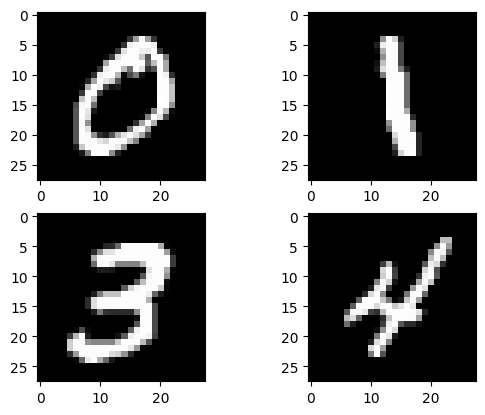

In [6]:
# Plot 4 images as gray scale

%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[9], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

## Random kernel_initializer

Actual Image


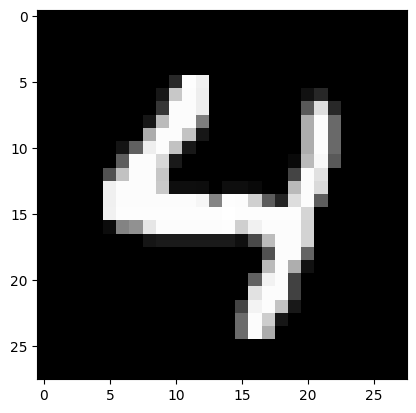

Random Weights Kennel


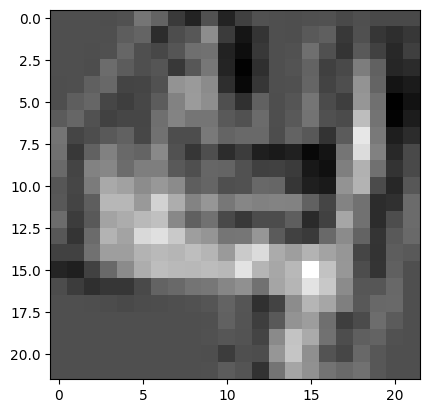

In [7]:
from keras.layers import Input

#i=int(np.random.rand(1,1)*60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[3611]


print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 name='conv1',
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

In [8]:
model.layers[0].weights[0]
#gr = tf.get_default_graph()


<tf.Variable 'conv1/kernel:0' shape=(7, 7, 1, 1) dtype=float32, numpy=
array([[[[ 0.04250541]],

        [[ 0.01803768]],

        [[ 0.01740564]],

        [[ 0.04522265]],

        [[-0.03046076]],

        [[-0.04390615]],

        [[-0.00247145]]],


       [[[ 0.00616567]],

        [[-0.02282467]],

        [[ 0.03825178]],

        [[ 0.04191634]],

        [[ 0.02132077]],

        [[ 0.04968278]],

        [[-0.03033913]]],


       [[[-0.0104587 ]],

        [[-0.02652497]],

        [[ 0.03812638]],

        [[-0.00428154]],

        [[-0.04739051]],

        [[ 0.01754532]],

        [[ 0.01694251]]],


       [[[-0.01306049]],

        [[-0.0137452 ]],

        [[-0.01433285]],

        [[ 0.0132359 ]],

        [[-0.00470674]],

        [[ 0.0109431 ]],

        [[ 0.00828008]]],


       [[[-0.04276766]],

        [[-0.0188588 ]],

        [[ 0.04200954]],

        [[ 0.04837582]],

        [[ 0.01685157]],

        [[-0.02344762]],

        [[-0.02156496]]],


       [[

### Constant kernel_initializer

In [20]:
import numpy as np
filter1=np.array([[100,1,1,1,1,1,1],
           [1,100,1,1,1,1,1],
           [1,1,100,1,1,1,1],
           [1,1,1,100,1,1,1],
           [1,1,1,1,100,1,1],
           [1,1,1,1,1,100,1],
           [1,1,1,1,1,1,100]])
print("filter1 \n", filter1)

#filter2=np.transpose(filter1)
filter2=np.array([[1,1,1,1,1,1,100],
           [1,1,1,1,1,100,1],
           [1,1,1,1,100,1,1],
           [1,1,1,100,1,1,1],
           [1,1,100,1,1,1,1],
           [1,100,1,1,1,1,1],
           [100,1,1,1,1,1,1]])
print("filter2 \n",filter2)

filter1 
 [[100   1   1   1   1   1   1]
 [  1 100   1   1   1   1   1]
 [  1   1 100   1   1   1   1]
 [  1   1   1 100   1   1   1]
 [  1   1   1   1 100   1   1]
 [  1   1   1   1   1 100   1]
 [  1   1   1   1   1   1 100]]
filter2 
 [[  1   1   1   1   1   1 100]
 [  1   1   1   1   1 100   1]
 [  1   1   1   1 100   1   1]
 [  1   1   1 100   1   1   1]
 [  1   1 100   1   1   1   1]
 [  1 100   1   1   1   1   1]
 [100   1   1   1   1   1   1]]


Actual Image


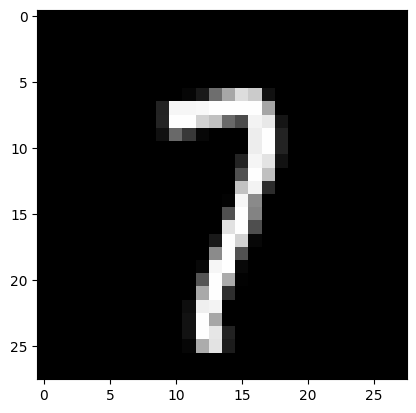

Horizontal Line


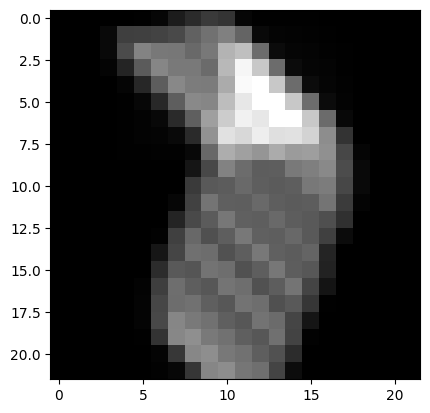

Vertical Line


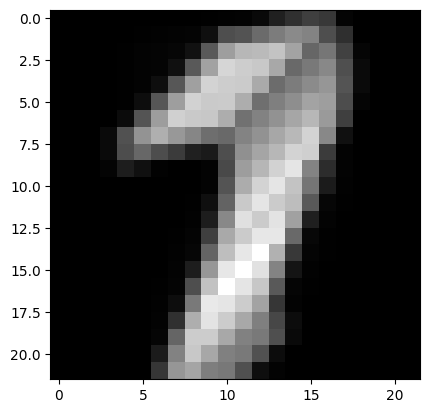

In [21]:
from keras.layers import Input

#Try #634 #924 #952 #3611  #4458
x=X_train[634]

print("Actual Image")
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()

print("Horizontal Line")

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter1.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

print("Vertical Line")
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(1,
                 kernel_size=7,
                 kernel_initializer=keras.initializers.Constant(filter2.reshape(7,7,1,1))))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

### Filters for Colour Images

52519
(28, 28)
[[192 216 216 136   0]
 [152 216  72  16   0]
 [216 252  16   0   0]
 [216 188   0   0   0]
 [216  44   0   0 120]]
(5, 5)


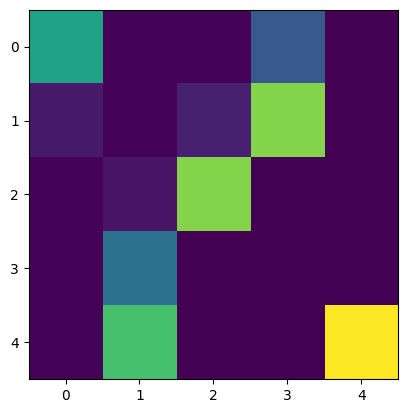

In [106]:
i = np.random.randint(1, 60000)
print(i)

%matplotlib inline

x = X_train[i]
print(x.shape)
y=x[10:15,10:15]
print(y*20)
print(y.shape)
plt.imshow((y*255).astype(np.uint8))

## Zero Padding 

Actual Image Shape  (28, 28)


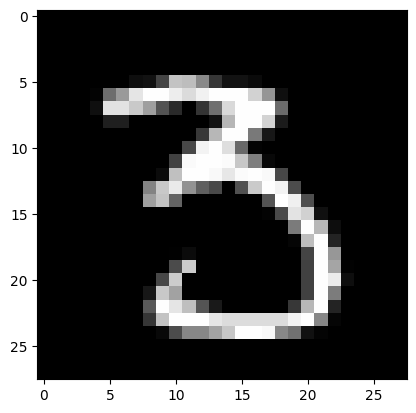

Random Weights Kennel siz3 7X7
Output Shape  (22, 22)


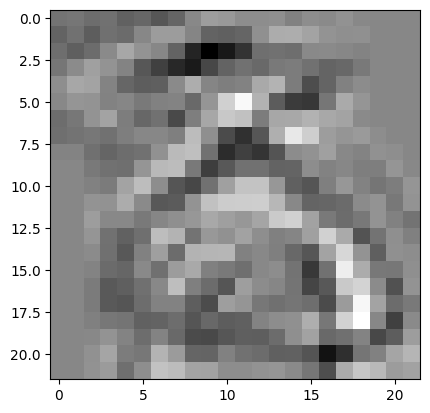

Random Weights Kennel siz3 5X5
Output Shape  (24, 24)


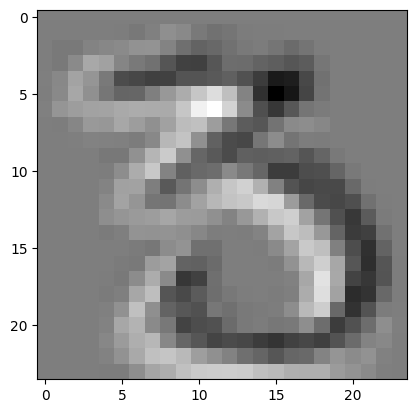

In [107]:
i = np.random.randint(0, 60000)
#634 #924 #952 #3611  #4458
import numpy as np
x=X_train[i]

print("Actual Image Shape " ,  x.shape)
plt.imshow(x, cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 7X7")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=7,
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()


print("Random Weights Kennel siz3 5X5")
from tensorflow.keras.layers import Conv2D
model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=1,
                 kernel_size=5,
                 kernel_initializer='random_uniform'))

img_reshape=np.expand_dims(x, axis=0)
img_reshape=np.expand_dims(img_reshape, axis=3)
img_reshape=model.predict(img_reshape, verbose=0)
pixels = np.matrix(img_reshape[:][:][:][0])
print("Output Shape " ,pixels.shape)
plt.imshow(pixels,cmap=plt.get_cmap('gray'))
plt.show()

## CNN for CIFAR10

In [108]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [109]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [110]:
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
X_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)


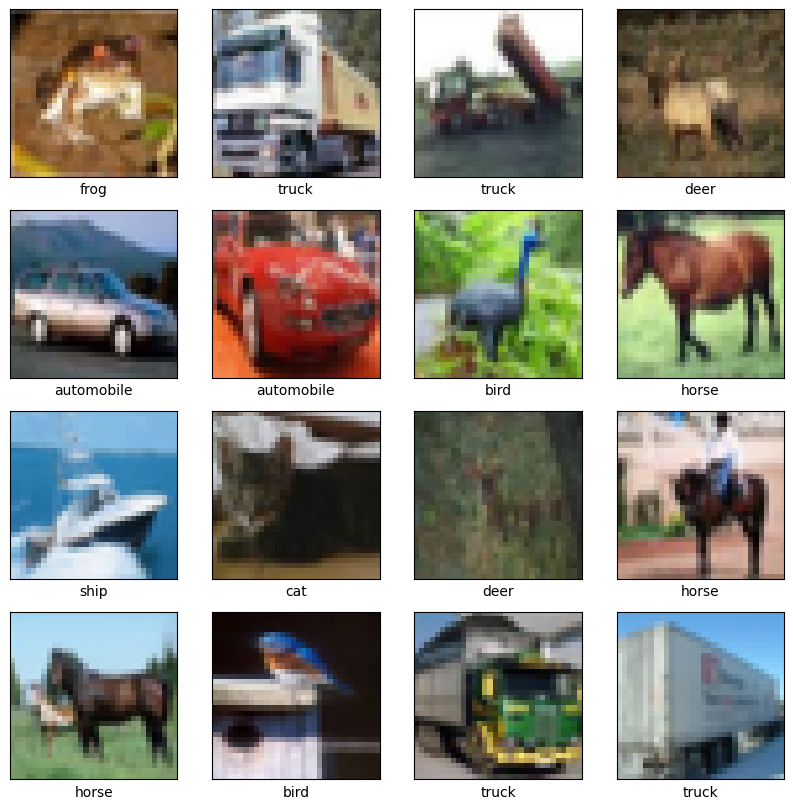

In [111]:
#Drawing Few images
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [112]:
model = models.Sequential()
model.add(Input(shape=(32,32,3)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,570 (885.04 KB)

 Trainable params: 226,570 (885.04 KB)

 Non-trainable params: 0 (0.00 B)

In [113]:
import time #To measure the execution time 
start = time.time()

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train, y_train, 
          batch_size=16,
          epochs=5, 
          validation_data=(X_test, y_test))

end = time.time()
print("Execution time is", int(end - start), "seconds")

2025-05-02 17:49:14.961840: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.
2025-05-02 17:49:15.482656: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2421 - loss: 2.0553 - val_accuracy: 0.4297 - val_loss: 1.5785
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4645 - loss: 1.4835 - val_accuracy: 0.5448 - val_loss: 1.2903
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5510 - loss: 1.2613 - val_accuracy: 0.5917 - val_loss: 1.1573
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6077 - loss: 1.1196 - val_accuracy: 0.6231 - val_loss: 1.0712
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6497 - loss: 1.0061 - val_accuracy: 0.6458 - val_loss: 1.0186
Execution time is 33 seconds


## Case Study- Sign Language Reading from Images 

In [23]:
!pip install gdown


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# download the dataset
import gdown
datafile = gdown.download("https://drive.google.com/file/d/1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp/view?usp=sharing", fuzzy=True)
print("data file downloaded at :", datafile)


Downloading...
From (original): https://drive.google.com/uc?id=1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp
From (redirected): https://drive.google.com/uc?id=1HSz6mRGzVuZGXFSM9omoK7D63sn2sZLp&confirm=t&uuid=ee67e6aa-4a8a-4a33-af6b-196f722bfcd4
To: C:\Users\gowtham.balachan\Downloads\GenAi\6. Neural Networks\sign-language-dataset.zip
100%|█████████████████████████████████████████████████████████████████████████████| 52.6M/52.6M [00:02<00:00, 19.6MB/s]

data file downloaded at : sign-language-dataset.zip


In [115]:
# extract the files.
!unzip -qu sign-language-dataset.zip

In [25]:
#Let us keep all the libraries ready
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D,  Activation
from tensorflow.keras.layers import Reshape, Input, Lambda
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import regularizers, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
from matplotlib.pyplot import imshow, imsave
import imageio.v2 as imageio
import random

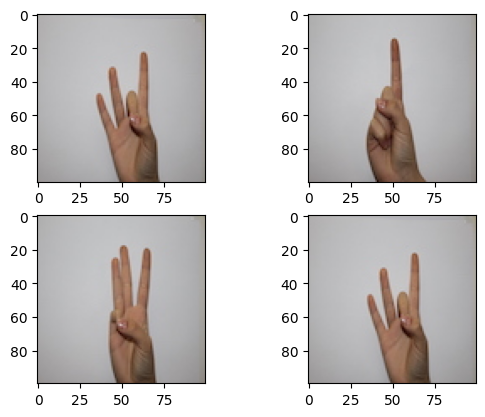

In [32]:
#Few random Images
fig, ax = plt.subplots(2,2)
location=r"C:\\Users\\gowtham.balachan\\Downloads\\GenAi\\6. Neural Networks\\sign-language-dataset\\Sign_Language_Digits\\Sign-Language-Digits-Dataset-master\\Dataset\\"
i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,0].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[0,1].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,0].imshow(img)

i=random.randint(1, 9)
img_id=18+i
img=imageio.imread(location+str(i)+"/IMG_11"+str(img_id)+".JPG")
ax[1,1].imshow(img)

In [33]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (100,100)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory
location_1=Data_path+"Sign_language_digits_dataset_64_64/"
########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") 

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [34]:
model1 = Sequential()

model1.add(Input(shape=(100,100,1)))
# Convolution layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))

# Pooling layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding second convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Adding third convolutional layer
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model1.add(Flatten())

# Step 4 - Fully connected dense layers
model1.add(Dense(units = 256, activation = 'relu'))
model1.add(Dense(units = 10, activation = 'softmax'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 98, 98, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)     

In [36]:
# model1 compilation
model1.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=15,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

model1.save_weights('m1_Sign_Language_20epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/15
7/7 [==============================] - 18s 3s/step - loss: 2.2857 - accuracy: 0.2255 - val_loss: 2.2889 - val_accuracy: 0.1877
Epoch 2/15
7/7 [==============================] - 17s 2s/step - loss: 2.2810 - accuracy: 0.2041 - val_loss: 2.2847 - val_accuracy: 0.2543
Epoch 3/15
7/7 [==============================] - 17s 2s/step - loss: 2.2722 - accuracy: 0.2803 - val_loss: 2.2760 - val_accuracy: 0.2222
Epoch 4/15
7/7 [==============================] - 17s 3s/step - loss: 2.2602 - accuracy: 0.3029 - val_loss: 2.2623 - val_accuracy: 0.3358
Epoch 5/15
7/7 [==============================] - 18s 2s/step - loss: 2.2343 - accuracy: 0.4223 - val_loss: 2.2384 - val_accuracy: 0.2494
Epoch 6/15
7/7 [==============================] - 17s 2s/step - loss: 2.1995 - accuracy: 0.2767 - val_loss: 2.1954 - val_accuracy: 0.2914
Epoch 7/15
7/7 [==============================] - 16s 3s/step - loss: 2.1195 - accuracy: 0.3589 - val_loss: 2.1041 - val_accuracy: 0.2938
Epoch 8/15
7/7 [==================

In [121]:
model1.load_weights(Data_path+"/Pre_trained_models/m1_Sign_Language_20epochs.h5")

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8872 - loss: 0.3652 - val_accuracy: 0.5852 - val_loss: 1.7468
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.8900 - loss: 0.3402 - val_accuracy: 0.5951 - val_loss: 1.8335


In [122]:
model1.load_weights(Data_path+"/Pre_trained_models/m1_Sign_Language_50epochs.h5")

model1.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.6543 - val_loss: 2.1869
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.6568 - val_loss: 2.1464


# Model2 - Model with Receptive field 

Change the image shape to 64X64 

In [123]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 256
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [124]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

/store/venv/da5401/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_58 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,562 (1.33 MB)

 Trainable params: 347,562 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [130]:
# model compilation
model2.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=50,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 273ms/step - accuracy: 0.1014 - loss: 2.3027 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0879 - loss: 2.3027 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0959 - loss: 2.3024 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0988 - loss: 2.3031 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0917 - loss: 2.3027 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.0935 - loss: 2.3031 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0999 - loss: 2.3026 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.0979 - loss: 2.3029 - val_accuracy: 0.1012 - val_loss: 2.3023

In [131]:
model2.save_weights('m2_Receptive_field_50epochs.weights.h5')

In [134]:
model2.load_weights(Data_path+"/Pre_trained_models/m2_Receptive_field_50epochs.h5")

model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), #total number of batches in one train epoch(train observation/batch size; also called iterations per epoch)
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), #total number of batches in validation(validation observation/batch size)
        verbose=1)

Epoch 1/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9994 - loss: 0.0354 - val_accuracy: 0.7531 - val_loss: 1.8057
Epoch 2/2
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9986 - loss: 0.0385 - val_accuracy: 0.7383 - val_loss: 1.7636


## Model2 - Model with Dropout and Receptive field 

Batchsize Changed 

In [135]:
########################
# Generators
########################

from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 64
target_size = (64,64)


########################
# Data Directory
########################

data_dir = location  # this is the image datasets directory

########################
# Data generator : Any preprocessing options/steps can be  defined here
########################
datagen = ImageDataGenerator(rescale = 1./255,  # scaling the images matrix(standard preprocessing step)
                             validation_split=0.2) # set validation split

########################
# Train generator
########################
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,   # resizing the input images to a specific size
    batch_size=batch_size,     # Batch size, iterator will generate a random batch with this size
    color_mode = 'grayscale',  # keeping the channel to grayscale for easy calculations
    class_mode='categorical',
    shuffle=True,
    subset="training") # set as training data

########################
# Validation generator
########################

validation_generator = datagen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    color_mode = 'grayscale', 
    class_mode='categorical',
    shuffle=True,
    subset="validation") # set as validation data

Found 1641 images belonging to 10 classes.
Found 405 images belonging to 10 classes.


In [136]:
model2 = Sequential()

# Convolution and Pooling layers
model2.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model2.add(Conv2D(32, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(Conv2D(64, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(Conv2D(128, (3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))
model2.add(Dropout(0.5))


# Flattening and  Fully connected dense layers
model2.add(Flatten())
model2.add(Dense(units = 32, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(units = 10, activation = 'softmax'))

model2.summary()

/store/venv/da5401/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_64 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 60, 60, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │        65,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,562 (1.33 MB)

 Trainable params: 347,562 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [137]:
# model compilation
model2.compile(optimizer =SGD(learning_rate=0.01, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=50,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

model2.save_weights('m2_Dropout_Rec_fld_50epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/50


/store/venv/da5401/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-05-02 17:57:18.195111: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,62,62]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:57:18.

22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1090 - loss: 2.3038

2025-05-02 17:57:22.238858: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[41,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[41,16,62,62]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:57:22.282124: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[41,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[41,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.1083 - loss: 2.3038

2025-05-02 17:57:25.508617: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,32,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,62,62]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:57:25.568118: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,64,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,30,30]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.1059 - loss: 2.3039 - val_accuracy: 0.1012 - val_loss: 2.3025
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0886 - loss: 2.3048 - val_accuracy: 0.1012 - val_loss: 2.3024
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.1025 - loss: 2.3022 - val_accuracy: 0.1012 - val_loss: 2.3022
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0870 - loss: 2.3038 - val_accuracy: 0.1012 - val_loss: 2.3022
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1014 - loss: 2.3026 - val_accuracy: 0.1012 - val_loss: 2.3023
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0887 - loss: 2.3029 - val_accuracy: 0.1012 - val_loss: 2.3022
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0978 - loss: 2.3029 - val_accuracy: 0.1012 - val_loss: 2.3021
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1096 - loss: 2.3019 - val_accuracy: 0.1210 - val_loss: 

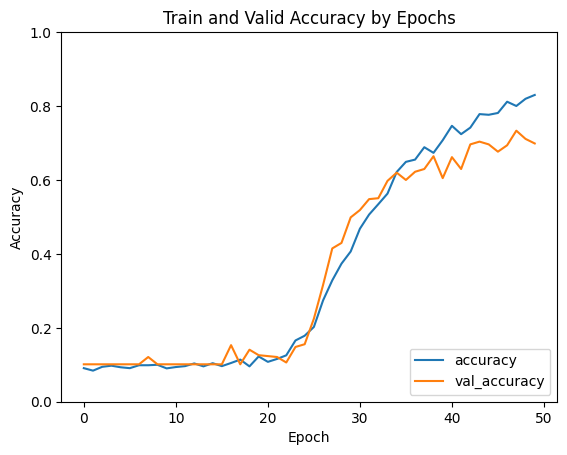

In [138]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [140]:
model2.load_weights(Data_path+"/Pre_trained_models/m2_Dropout_Rec_fld_50epochs.h5")

history=model2.fit(
        train_generator, 
        #steps_per_epoch = len(train_generator), 
        epochs=2,
        validation_data = validation_generator,
        #validation_steps = len(validation_generator), 
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8119 - loss: 0.5070 - val_accuracy: 0.7778 - val_loss: 0.6169
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8212 - loss: 0.5118 - val_accuracy: 0.8420 - val_loss: 0.4834


#### Dropout 100 epochs

In [141]:
model2.load_weights(Data_path+"/Pre_trained_models/m2_Dropout_Rec_fld_100epochs.h5")

history=model2.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9305 - loss: 0.1756 - val_accuracy: 0.8815 - val_loss: 0.3484
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9559 - loss: 0.1372 - val_accuracy: 0.8593 - val_loss: 0.5046


## Batch Normalization

In [142]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape = (32, 32, 1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(2, (3, 3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(3, (3, 3)))
model.add(BatchNormalization())

model.summary()

/store/venv/da5401/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_70 (Conv2D)              │ (None, 30, 30, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 15, 15, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 13, 13, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 2)      │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 2)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 2)        │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 4, 4, 3)        │            57 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 3)        │            12 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 18 (72.00 B)

## Model3 with Batch Normalization. 

In [143]:
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(16, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation = 'relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Conv2D(64, (3, 3), activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(units = 16, activation = 'relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units = 10, activation = 'softmax'))

model3.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 62, 62, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 30, 30, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │        16,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 52,074 (203.41 KB)

 Trainable params: 51,754 (202.16 KB)

 Non-trainable params: 320 (1.25 KB)

In [144]:
model3.compile(optimizer =SGD(learning_rate=0.03, momentum = 0.9), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit(
        train_generator, 
        epochs=200,
        validation_data = validation_generator,
        verbose=1)

model3.save_weights('m3_BatchNorm_200epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/200


2025-05-02 17:59:14.216873: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,16,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,62,62]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:59:14.318454: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,30,30]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

11/26 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1216 - loss: 3.3251

2025-05-02 17:59:18.747287: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[41,16,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[41,16,62,62]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:59:18.800620: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[41,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[41,16,30,30]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

21/26 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.1162 - loss: 3.0506

2025-05-02 17:59:22.967703: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,16,60,60]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,62,62]{3,2,1,0}, f32[16,16,3,3]{3,2,1,0}, f32[16]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-05-02 17:59:23.046706: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[64,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,16,30,30]{3,2,1,0}, f32[32,16,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_

26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 245ms/step - accuracy: 0.1155 - loss: 2.9481 - val_accuracy: 0.0963 - val_loss: 102.3200
Epoch 2/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1708 - loss: 2.2286 - val_accuracy: 0.1333 - val_loss: 42.7641
Epoch 3/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2190 - loss: 2.1018 - val_accuracy: 0.1333 - val_loss: 6.5944
Epoch 4/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2242 - loss: 2.0414 - val_accuracy: 0.1309 - val_loss: 3.0219
Epoch 5/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2836 - loss: 1.9686 - val_accuracy: 0.1580 - val_loss: 2.8610
Epoch 6/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2575 - loss: 1.9814 - val_accuracy: 0.2173 - val_loss: 2.2187
Epoch 7/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3104 - loss: 1.8712 - val_accuracy: 0.2765 - val_loss: 2.1760
Epoch 8/200
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3224 - loss: 1.8541 - val_accuracy: 0.2741 - 

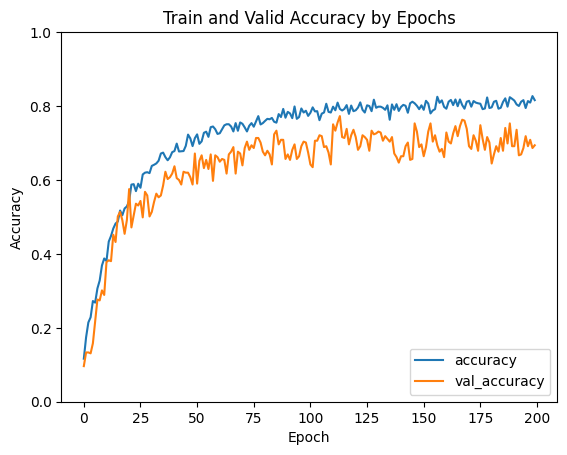

In [145]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [146]:
model3.load_weights(Data_path+"/Pre_trained_models/m3_BatchNorm_200epochs.h5")

history=model3.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8413 - loss: 0.4917 - val_accuracy: 0.7802 - val_loss: 0.7071
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8208 - loss: 0.5137 - val_accuracy: 0.7531 - val_loss: 0.8194


## Adam  Optimizer 

In [ ]:
model3.compile(optimizer =Adam(learning_rate=0.005, beta_1=0.9, beta_2=0.999), loss = 'categorical_crossentropy', metrics = ['accuracy'])

########################
# fit model and train
########################

import time
start = time.time()

history=model3.fit(
        train_generator, 
        epochs=100,
        validation_data = validation_generator,
        verbose=1)

model3.save_weights('m3_BatchNorm_and_Adam_100epochs.weights.h5')

end = time.time()
print("Execution time is", int(end - start), "seconds")

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 225ms/step - accuracy: 0.8303 - loss: 0.4544 - val_accuracy: 0.7136 - val_loss: 1.0085
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8225 - loss: 0.5319 - val_accuracy: 0.7333 - val_loss: 1.0941
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8085 - loss: 0.5339 - val_accuracy: 0.8049 - val_loss: 0.7150
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8155 - loss: 0.5436 - val_accuracy: 0.6667 - val_loss: 1.4792
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8268 - loss: 0.5352 - val_accuracy: 0.5926 - val_loss: 1.9876
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8047 - loss: 0.6218 - val_accuracy: 0.7012 - val_loss: 1.0540
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8266 - loss: 0.5273 - val_accuracy: 0.7284 - val_loss: 0.9430
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8318 - loss: 0.4944 - val_accuracy: 

ValueError: The filename must end in `.weights.h5`. Received: filepath=m3_BatchNorm_and_Adam_100epochs.h5

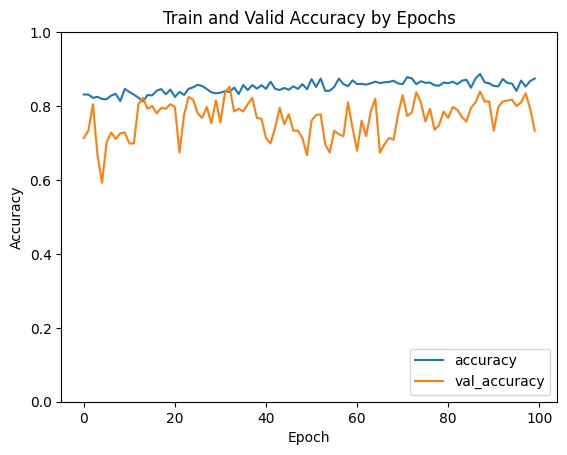

In [148]:
## Plotting the results 
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title("Train and Valid Accuracy by Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')

In [149]:
model3.load_weights(Data_path+"/Pre_trained_models/m3_BatchNorm_and_Adam_100epochs.h5")

history=model3.fit(
        train_generator, 
        epochs=2,
        validation_data = validation_generator,
        verbose=1)

Epoch 1/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8341 - loss: 0.5103 - val_accuracy: 0.3407 - val_loss: 1.8683
Epoch 2/2
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7699 - loss: 0.6452 - val_accuracy: 0.6469 - val_loss: 2.1595
